In [13]:
import pandas as pd
import os
from settings import comparison_dict

In [14]:
def load_data(fname, geog):
    df = pd.DataFrame()
    for scen_name, scen_path in comparison_dict.items():
        _df = pd.read_csv(os.path.join(scen_path,r'outputs\compare', geog ,fname))
        _df['source'] = scen_name
        df = df.append(_df)
    
    return df

In [15]:
geog = 'lowinc'
geog_col = 'hh_lowinc'

# Population

In [16]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('1_population.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Persons')

source,Base,Scenario 1,Scenario 2
hh_lowinc,,,
0,"3,752,530","3,752,530","3,752,530"
1,"287,483","287,483","287,483"


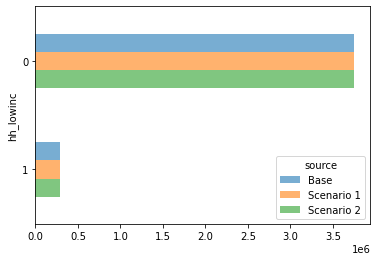

In [17]:
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# Employment

In [18]:
df = load_data('2_employment.csv', geog)
df['Workers'] = df['Paid Full-Time Worker']+df['Paid Part-Time Worker']
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Workers')
df

source,Base,Scenario 1,Scenario 2
hh_lowinc,,,
0,"1,887,165","1,887,165","1,887,165"
1,"131,419","131,419","131,419"


# Transit Ridership

source,Base,Scenario 1,Scenario 2
hh_lowinc,,,
0,"422,039","422,039","422,039"
1,"48,120","48,120","48,120"


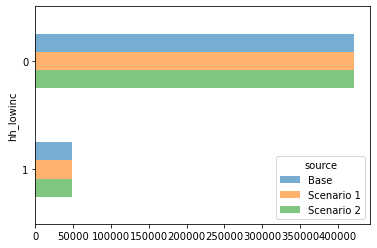

In [19]:
df = load_data('3_transit_trips.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='trexpfac')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

## Transit Commute Mode Share

source,Base,Scenario 1,Scenario 2
hh_lowinc,,,
0,5.7%,5.7%,5.7%
1,8.1%,8.1%,8.1%


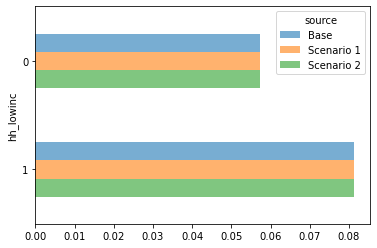

In [20]:
pd.options.display.float_format = '{:0,.1%}'.format
df = load_data('4_transit_commute_share.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='mode_share')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df

# VMT

source,Base,Scenario 1,Scenario 2
hh_lowinc,,,
0,"64,863,159","64,863,159","64,863,159"
1,"3,638,585","3,638,585","3,638,585"
Total,"68,501,744","68,501,744","68,501,744"


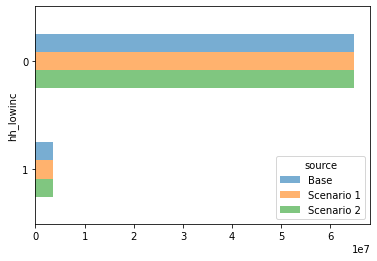

In [21]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('5_vmt.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='VMT')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

source,Base,Scenario 1,Scenario 2
hh_lowinc,,,
0,"64,863,159","64,863,159","64,863,159"
1,"3,638,585","3,638,585","3,638,585"
Total,"68,501,744","68,501,744","68,501,744"


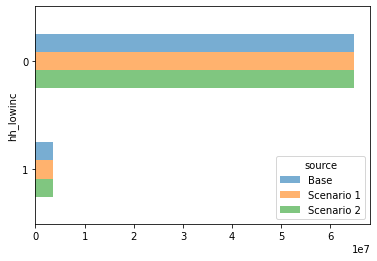

In [22]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('5_vmt.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='VMT')
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

# Delay
**Total Delay Hours per Day**

source,Base,Scenario 1,Scenario 2
hh_lowinc,,,
0,"310,302","310,302","310,302"
1,"16,983","16,983","16,983"
Total,"327,285","327,285","327,285"


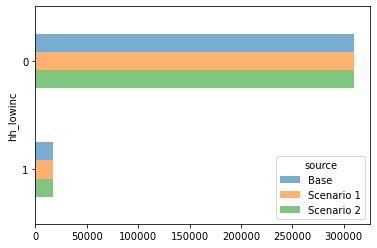

In [23]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('7_delay.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', aggfunc='sum', values='Total Delay Hours')
df = df.clip(lower=0)
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df

**Delay Hours per Household**


source,Base,Scenario 1,Scenario 2
hh_lowinc,,,
0,12.5,12.5,12.5
1,8.7,8.7,8.7
Total,21.3,21.3,21.3


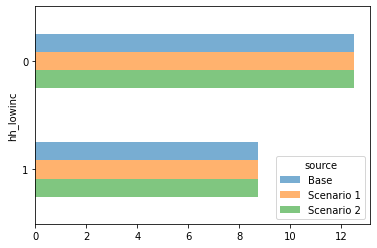

In [24]:
pd.options.display.float_format = '{:0,.1f}'.format
df = load_data('7_delay.csv', geog)
df = df.pivot_table(index=geog_col, columns='source', 
                    aggfunc='sum', values='Avg. Minutes of Delay per Household')
df = df.clip(lower=0)
df.plot(kind='barh', alpha=0.6).invert_yaxis()
df.loc['Total'] = df.sum(axis=0)
df